In [112]:
import pandas as pd
import numpy as np
import fiona
from geoband.API import *

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture as GMM

import folium

In [57]:
# 한글 폰트 적용
import matplotlib.font_manager as fm
import matplotlib as mpl
path='NanumBarunGothic.ttf'
fontprop=fm.FontProperties(fname=path)
mpl.rc('font',family='NanumBarunGothic')

In [58]:
gdf=gpd.read_file('fin_df2.geojson')
gdf.head()

gdf=gdf.drop(gdf[gdf['gid500'] == '다아65a18a'].index) # 이상치 제거

In [59]:
# 년도별 매출 합 변수 생성

gdf['sales_est_amt_2017']=gdf['sales_est_amt_201703']+gdf['sales_est_amt_201706']+gdf['sales_est_amt_201709']+gdf['sales_est_amt_201712']
gdf['sales_est_amt_2018']=gdf['sales_est_amt_201803']+gdf['sales_est_amt_201806']+gdf['sales_est_amt_201809']+gdf['sales_est_amt_201812']
gdf['sales_est_amt_2019']=gdf['sales_est_amt_201903']+gdf['sales_est_amt_201906']+gdf['sales_est_amt_201909']+gdf['sales_est_amt_201912']
gdf['sales_est_amt_2020']=gdf['sales_est_amt_202003']+gdf['sales_est_amt_202006']+gdf['sales_est_amt_202009']
gdf['sales_est_amt_total']=gdf['sales_est_amt_2017']+gdf['sales_est_amt_2018']+gdf['sales_est_amt_2019']+gdf['sales_est_amt_2020']

In [60]:
feature_lst=['all_cnt', 'old_cnt', 'adult_cnt', 'young_cnt', '건물연면적',
       'ws_cnt', 'found_age_1', 'found_age_2', 'found_age_3', 'found_age_4',
       'found_age_5', 'found_age_6', 'runout_cnt', 'smbiz_yn_cnt',
       'rpr_per_gender_m', 'rpr_per_gender_f', 'rpr_per_age_bin_10',
       'rpr_per_age_bin_20', 'rpr_per_age_bin_30to50',
       'rpr_per_age_bin_50over', 'sme_loan_cnt', 'sme_loan_y_1',
       'sme_loan_y_2', 'sme_loan_y_3', 'sme_loan_y_4', 'sme_loan_y_5',
       'sme_loan_y_6','age10_ratio', 'age20_ratio', 'age30_ratio',
       'age40_ratio', 'age50_ratio', 'age60_ratio', 'age70_ratio',
       'indcd_b_yn', 'indcd_d_yn', 'indcd_e_yn', 'indcd_o_yn', 'indcd_u_yn',
       'cnt_market', 'cnt_busstop', 'cnt_subway', 'cnt_clinic', 'cnt_hospital',
       'cnt_element_s', 'cnt_middles_s', 'cnt_high_s', 'cnt_university',
       'cnt_landmark']

In [61]:
X=gdf[feature_lst]
gmm=GMM(n_components=4,random_state=1234).fit(X)
labels=gmm.predict(X)

In [62]:
gdf['label']=labels

<AxesSubplot:>

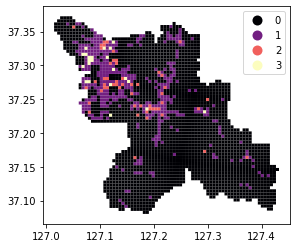

In [63]:
gdf.plot(column='label',categorical=True,legend=True,cmap='magma')

In [64]:
gdf.groupby('label').count()

,gid500,all_cnt,old_cnt,adult_cnt,young_cnt,건물연면적,ws_cnt,found_age_1,found_age_2,found_age_3,...,cnt_middles_s,cnt_high_s,cnt_university,cnt_landmark,geometry,sales_est_amt_2017,sales_est_amt_2018,sales_est_amt_2019,sales_est_amt_2020,sales_est_amt_total
label,,,,,,,,,,,,,,,,,,,,,
0,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105,...,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105
1,410,410,410,410,410,410,410,410,410,410,...,410,410,410,410,410,410,410,410,410,410
2,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
3,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [65]:
clt_df=pd.DataFrame(gdf.groupby('label').mean().reset_index()).T
clt_df.columns=['cluster0','cluster1','cluster2','cluster3']
clt_df

,cluster0,cluster1,cluster2,cluster3
label,0.000000,1.000000,2.000000,3.000000
all_cnt,43.644656,1756.178049,2082.788462,5872.681818
old_cnt,5.895487,233.560976,276.115385,871.818182
adult_cnt,28.533017,1262.980488,1567.480769,4109.636364
young_cnt,3.762945,245.839024,224.807692,886.090909
...,...,...,...,...
sales_est_amt_2017,0.000000,44568.485366,114864.096154,214271.772727
sales_est_amt_2018,0.000000,53904.670732,139209.615385,255654.863636
sales_est_amt_2019,0.000000,59305.339024,151033.711538,281725.772727
sales_est_amt_2020,0.000000,42585.643902,107218.211538,199134.909091


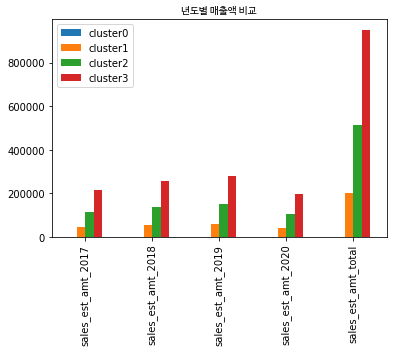

In [13]:
# 매출
clt_df.iloc[81:].plot.bar()
plt.title('년도별 매출액 비교',fontproperties=fontprop)
font_name=fm.FontProperties(fname=path).get_name()
plt.show()
# 핫스팟과 grid가 가장 많이 겹치는 3번 군집이 17~20년도 모든 시기의 매출액이 가장 많다는 것을 알 수 있다.

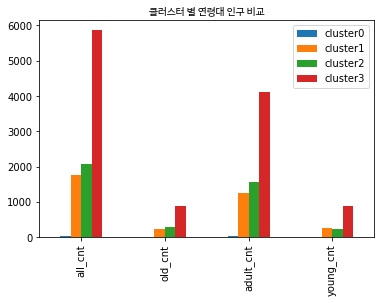

In [14]:
# 인구
clt_df.iloc[1:5,:].plot.bar()
plt.title('클러스터 별 연령대 인구 비교',fontproperties=fontprop)
plt.show()

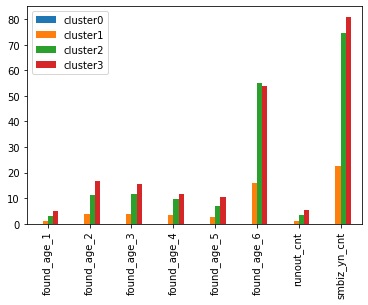

In [16]:
# 사업장 관련 변수
clt_df.iloc[7:15,:].plot.bar()
plt.show()
# runout_cnt: 휴폐업장 수
# smbiz_yn_cnt: 소상공인 사업체 수

# 다른 변수의 경향성과는 다르게 5년 이상된 사업체 수는 cluster2에서 가장 높았다.
# 창업후 3년 ~ 5년 기간의 '죽음의 계곡'을 넘긴 5년 이상의 사업자 수가 가장 많았던 군집은 2번 군집이다.

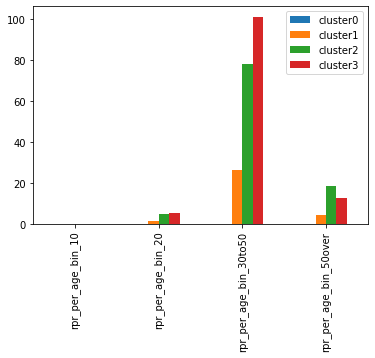

In [18]:
# 대표자 관련 변수
clt_df.iloc[17:21,:].plot.bar()
plt.title('대표자 나이대 비교',fontproperties=fontprop)
plt.show()

# 50대 이상의 대표자는 3번군집보다 2번 군집에서 더 높은 값을 가졌고, 20대는 비슷한 값을 갖는다.

In [44]:
age20_df=clt_df.T['rpr_per_age_bin_20']
age20=age20_df/age20_df.sum(axis=0)
age20

cluster0    0.000000
cluster1    0.107076
cluster2    0.428271
cluster3    0.464652
Name: rpr_per_age_bin_20, dtype: float64

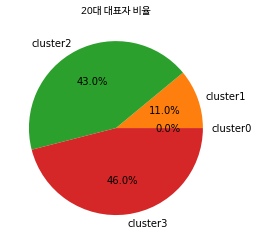

In [67]:
# 20대 대표자 비율파악
age20_df=clt_df.T['rpr_per_age_bin_20']
age20=age20_df/age20_df.sum(axis=0)
ratio=[round(age20[i],2) for i in range(4)]
labels=['cluster0','cluster1','cluster2','cluster3']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('20대 대표자 비율',fontproperties=fontprop)
plt.show()

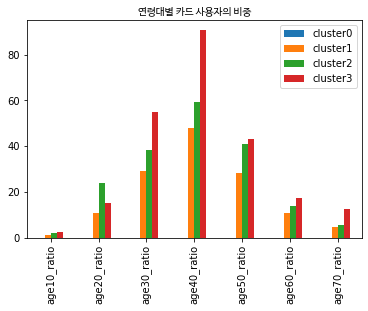

In [50]:
# 카드관련 변수
clt_df.iloc[43:50].plot.bar()
plt.title('연령대별 카드 사용자의 비중',fontproperties=fontprop)
plt.show()
# 20대의 카드 사용비중은 cluster 2에서 가장 높았다.

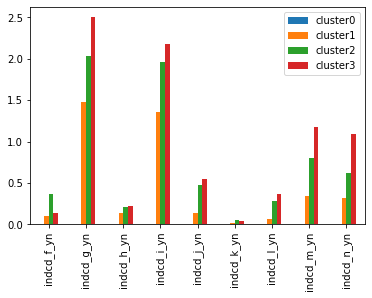

In [87]:
# 업종
clt_df.iloc[55:64,:].plot.bar()
plt.show()

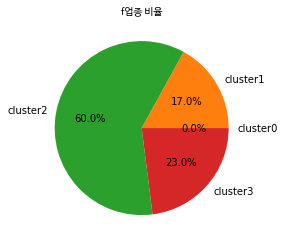

In [88]:
# f업종(건설업) 비율 파악
f_df=clt_df.T['indcd_f_yn']
f=f_df/f_df.sum(axis=0)
ratio=[round(f[i],2) for i in range(4)]
labels=['cluster0','cluster1','cluster2','cluster3']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('f업종 비율',fontproperties=fontprop)
plt.show()

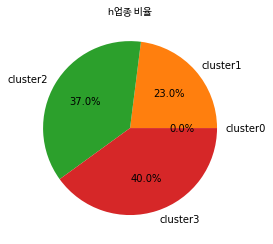

In [90]:
# h업종(운수업) 비율 파악
h_df=clt_df.T['indcd_h_yn']
h=h_df/h_df.sum(axis=0)
ratio=[round(h[i],2) for i in range(4)]
labels=['cluster0','cluster1','cluster2','cluster3']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('h업종 비율',fontproperties=fontprop)
plt.show()

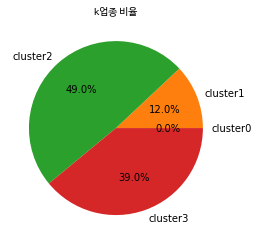

In [92]:
# k업종(금융 및 보험업) 비율 파악
k_df=clt_df.T['indcd_k_yn']
k=k_df/k_df.sum(axis=0)
ratio=[round(k[i],2) for i in range(4)]
labels=['cluster0','cluster1','cluster2','cluster3']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('k업종 비율',fontproperties=fontprop)
plt.show()

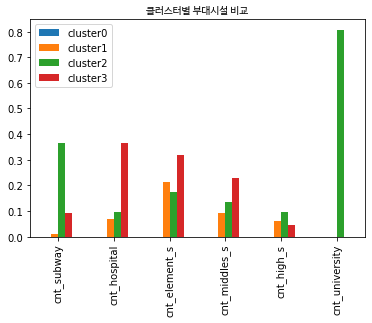

In [107]:
# 부대시설
clt_df.iloc[np.r_[73,75:80]].plot.bar()
plt.title('클러스터별 부대시설 비교',fontproperties=fontprop)
plt.show()

# 지하철, 고등학교 는 2번 군집에서 많이 발견되고 특히 대학가는 2번 군집에 많이 할당되었다.

# cluster2 위치 확인

In [109]:
cluster2=gdf[gdf['label']==2].reset_index(drop=True)

In [117]:
# 용인시 중심부의 위도, 경도 
center = [37.2410864, 127.1775537]
data=cluster2['geometry']
g=gdf.to_crs('EPSG:4326')
m=folium.Map(location=center,zoom_start=10)
folium.GeoJson(data=data).add_to(m)
m

# cluster3 위치확인

In [113]:
cluster3=gdf[gdf['label']==3].reset_index(drop=True)

In [116]:
# 용인시 중심부의 위도, 경도 
center = [37.2410864, 127.1775537]
data=cluster3['geometry']
g=gdf.to_crs('EPSG:4326')
m=folium.Map(location=center,zoom_start=10)
folium.GeoJson(data=data).add_to(m)
m